In [2]:
pwd

'/mmfs1/data/aglinska/BC-MRI-AE/misc/umap_consistency_analysis'

In [27]:
%%time
import ants
import pandas as pd
import numpy as np

CPU times: user 4 µs, sys: 6 µs, total: 10 µs
Wall time: 11.7 µs


In [5]:
n = 10

In [30]:
dfs_LR = [pd.read_csv(f'corner_LR_{i:03d}.csv') for i in range(1,n+1)]
dfs_TB = [pd.read_csv(f'corner_TB_{i:03d}.csv') for i in range(1,n+1)]

In [36]:
overlap_mat_LR = np.zeros((n,n))
overlap_mat_TB = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        overlap_mat_LR[i,j] = dfs_LR[i]['low'].isin(dfs_LR[j]['low']).values.mean()
        overlap_mat_TB[i,j] = dfs_TB[i]['low'].isin(dfs_TB[j]['low']).values.mean()

In [45]:
overlap_mat_TB

array([[1.  , 0.36, 0.42, 0.36, 0.24, 0.56, 0.  , 0.  , 0.28, 0.32],
       [0.36, 1.  , 0.84, 0.9 , 0.7 , 0.66, 0.02, 0.  , 0.8 , 0.76],
       [0.42, 0.84, 1.  , 0.8 , 0.68, 0.66, 0.02, 0.06, 0.72, 0.82],
       [0.36, 0.9 , 0.8 , 1.  , 0.62, 0.62, 0.1 , 0.04, 0.84, 0.68],
       [0.24, 0.7 , 0.68, 0.62, 1.  , 0.46, 0.04, 0.  , 0.74, 0.76],
       [0.56, 0.66, 0.66, 0.62, 0.46, 1.  , 0.02, 0.02, 0.58, 0.52],
       [0.  , 0.02, 0.02, 0.1 , 0.04, 0.02, 1.  , 0.06, 0.1 , 0.02],
       [0.  , 0.  , 0.06, 0.04, 0.  , 0.02, 0.06, 1.  , 0.04, 0.06],
       [0.28, 0.8 , 0.72, 0.84, 0.74, 0.58, 0.1 , 0.04, 1.  , 0.7 ],
       [0.32, 0.76, 0.82, 0.68, 0.76, 0.52, 0.02, 0.06, 0.7 , 1.  ]])

In [47]:
triu = np.triu_indices(n,k=1)

In [50]:
print(overlap_mat_LR[triu].mean())
print(overlap_mat_TB[triu].mean())

0.39200000000000007
0.4


In [61]:
maps_LR = [ants.image_read(f'zmap_LR_{i:03d}.nii') for i in range(1,n+1)]
maps_TB = [ants.image_read(f'zmap_TB_{i:03d}.nii') for i in range(1,n+1)]

In [79]:
flat_TB = np.array([maps_TB[i].numpy().flatten() for i in range(n)])
flat_TB = flat_TB[:,(flat_TB**2).sum(axis=0)>.1]
np.corrcoef(flat_TB)[triu].mean()

0.44244347059886974

In [78]:
flat_LR = np.array([maps_LR[i].numpy().flatten() for i in range(n)])
flat_LR = flat_LR[:,(flat_LR**2).sum(axis=0)>.1]
np.corrcoef(flat_LR)[triu].mean()

0.4921010771752236

In [80]:
def plot_glass_brain(stat_maps_unpaired,threshold=3.1,con_name='t_con',title=None):
    from nilearn import plotting
    display = plotting.plot_glass_brain(
    stat_maps_unpaired, threshold=threshold, colorbar=True, plot_abs=False,
    title=title, vmin=0, vmax=6)

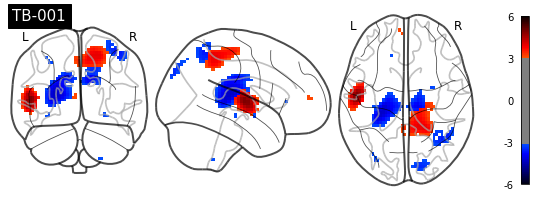

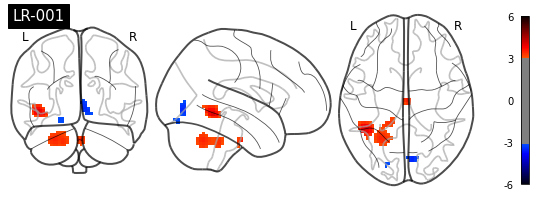

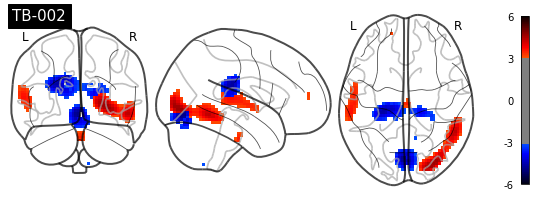

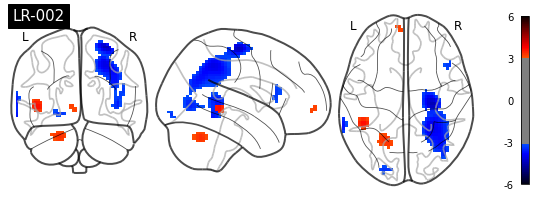

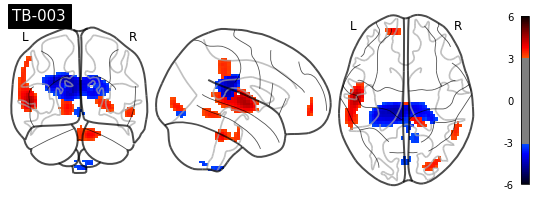

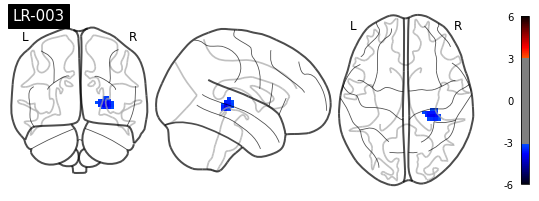

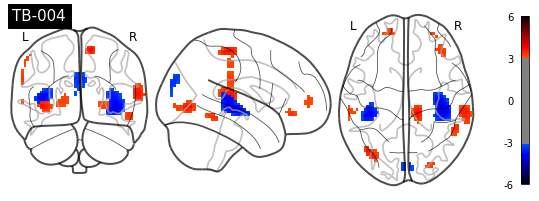

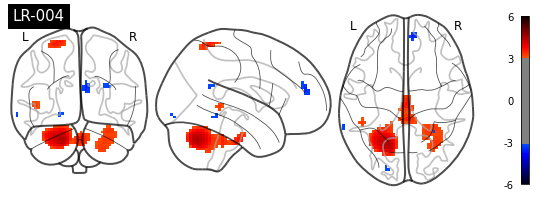

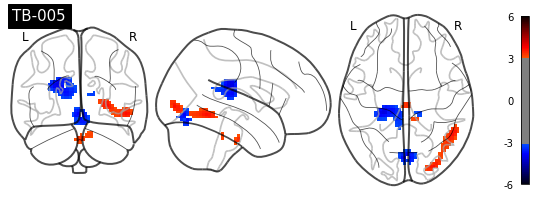

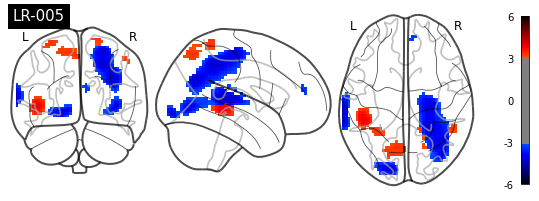

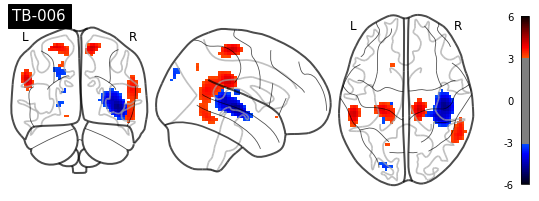

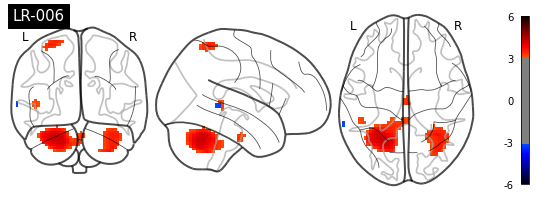

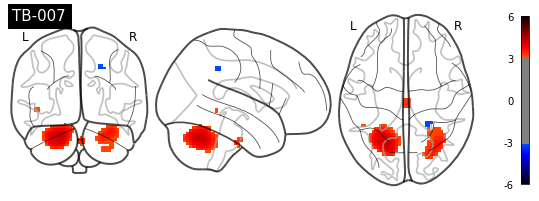

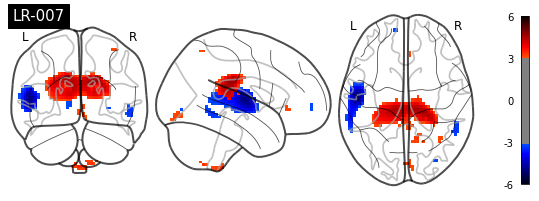

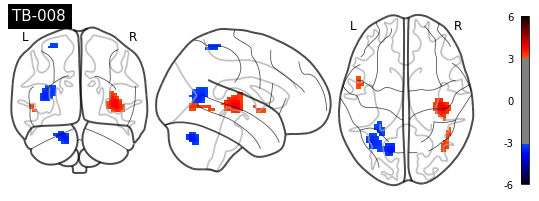

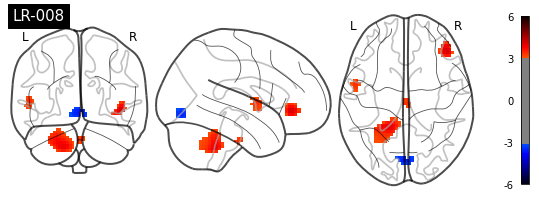

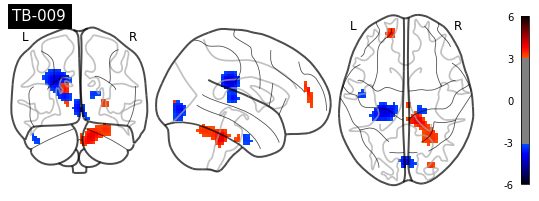

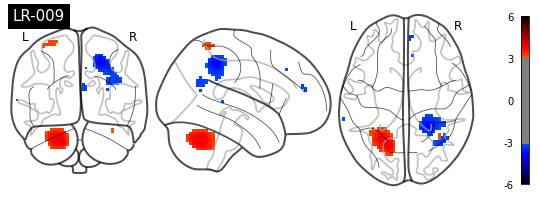

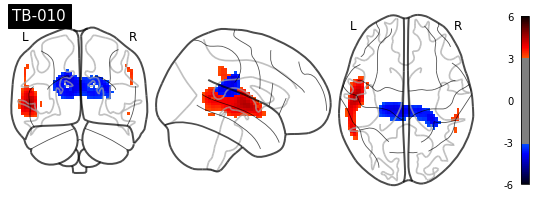

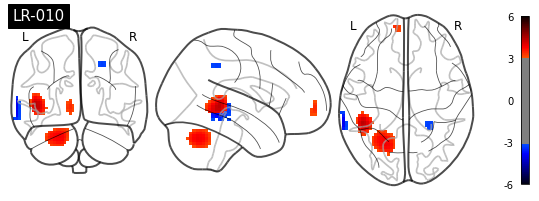

In [88]:
for i in range(n):
    plot_glass_brain(maps_TB[i].to_nibabel(),title=f'TB-{i+1:03d}')
    plot_glass_brain(maps_LR[i].to_nibabel(),title=f'LR-{i+1:03d}')

In [107]:
from matplotlib import pyplot as plt
import seaborn as sns

In [112]:
# plt.hist(flat_LR[0,:],alpha=.3)
# plt.hist(flat_TB[0,:],alpha=.3)
# plt.legend(['brain1','brain2'])
# plt.title('Brain hostograms')
# plt.ylabel('count')
# plt.xlabel('intesity')

In [113]:
pwd

'/mmfs1/data/aglinska/BC-MRI-AE/misc/umap_consistency_analysis'

In [115]:
df = pd.read_csv('../../Data/ABIDE_legend_S982.csv')

In [116]:
df

,Unnamed: 0,index,BIDS_ID,Anonymized ID,Subject Type,Visit,Days since enrollment,SubID,DxGroup,DSMIVTR,...,WISC4 Sym Scaled,Age at MPRAGE,Current Med Status,Medication Name,Medication Name.1,Off stimulants at EPI scan?,ScanSite,ScannerType,ScannerID,ScanSiteID
0,0,0,sub-001,A00033348,PATIENT,session_1,8,51320,1,2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
1,1,1,sub-002,A00033398,CONTROL,session_1,8,51373,2,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
2,2,2,sub-003,A00033352,PATIENT,session_1,8,51324,1,2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
3,3,3,sub-004,A00033389,CONTROL,session_1,8,51364,2,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
4,4,4,sub-005,A00033354,PATIENT,session_1,8,51326,1,2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,977,1094,sub-985,A00032725,CONTROL,session_1,28,51252,2,0.0,...,NaN,10.99,0.0,NaN,NaN,NaN,ucla,triotim,6,12
978,978,1095,sub-986,A00032704,PATIENT,session_1,28,51229,1,1.0,...,NaN,14.59,0.0,NaN,NaN,NaN,ucla,triotim,6,12
979,979,1096,sub-987,A00032740,CONTROL,session_1,28,51268,2,0.0,...,NaN,17.78,0.0,NaN,NaN,NaN,ucla,triotim,6,12
980,980,1098,sub-989,A00032686,PATIENT,session_1,28,51210,1,1.0,...,NaN,16.56,0.0,NaN,NaN,NaN,ucla,triotim,6,12


In [122]:
df['AgeAtScan'].mean(),
df['AgeAtScan'].std(),
df['AgeAtScan'].max(),
df['AgeAtScan'].min(),

6.47

In [128]:
'mean={:.2f}'.format(df['AgeAtScan'].values.mean())

'mean=17.51'

In [131]:
'Overall age: mean={:.2f},std={:.2f},range {:.1f}-{:.1f}'.format(df['AgeAtScan'].mean(),
                                                df['AgeAtScan'].std(),
                                                df['AgeAtScan'].max(),
                                                df['AgeAtScan'].min(),)

'Overall age: mean=17.51,std=8.34,range 64.0-6.5'